#  Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

# Loading CSV file of EBL



In [36]:
start ='2011-05-16'
end='2019-05-12'

df=pd.read_csv("/content/EBL.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.no    1917 non-null   int64  
 1   Symbol  1917 non-null   object 
 2   Date    1917 non-null   object 
 3   Open    1917 non-null   float64
 4   High    1917 non-null   float64
 5   Low     1917 non-null   float64
 6   Close   1917 non-null   float64
 7   Vol     1917 non-null   float64
 8   Year    1917 non-null   int64  
 9   Month   1917 non-null   int64  
 10  Day     1917 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 164.9+ KB


Dropping Unnecessary Columns

In [37]:
df=df.drop(['Year','Month','Day'],axis=1)
df.head()

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,17,EBL,2012-01-01,696.0,695.0,681.0,685.0,6914.0
1,14,EBL,2012-01-02,685.0,714.0,680.0,714.0,9126.0
2,19,EBL,2012-01-03,714.0,714.0,700.0,700.0,4018.0
3,17,EBL,2012-01-04,700.0,700.0,680.0,681.0,18324.0
4,11,EBL,2012-01-05,681.0,702.0,680.0,702.0,5733.0


Plotting the closing price of EBL from 2011 to 2019

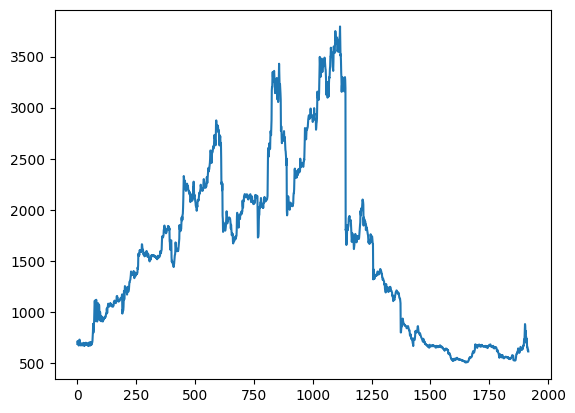

In [38]:
plt.plot(df.Close)

Renaming the columns to make it easier to code

In [5]:
df.rename(columns={'Vol': 'traded_quantity','Close':'close','High':'high','Date':'date','Open':'open','Symbol':'symbol','S.no':'s.no','Low':'low'}, inplace=True)
df


,s.no,symbol,date,open,high,low,close,traded_quantity
0,17,EBL,2012-01-01,696.0,695.0,681.0,685.0,6914.0
1,14,EBL,2012-01-02,685.0,714.0,680.0,714.0,9126.0
2,19,EBL,2012-01-03,714.0,714.0,700.0,700.0,4018.0
3,17,EBL,2012-01-04,700.0,700.0,680.0,681.0,18324.0
4,11,EBL,2012-01-05,681.0,702.0,680.0,702.0,5733.0
...,...,...,...,...,...,...,...,...
1912,27,EBL,2020-03-16,650.0,678.0,641.0,656.0,45835.0
1913,26,EBL,2020-03-17,665.0,670.0,632.0,640.0,50623.0
1914,25,EBL,2020-03-18,633.0,648.0,594.0,620.0,37433.0
1915,25,EBL,2020-03-19,608.0,645.0,590.0,630.0,43107.0


# Feature Engineering


*   **Technical Indicator**
        

1.     100 day moving average
2.     200 day moving average







In [6]:
ma100=df.close.rolling(100).mean()
ma100

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
1912    605.32
1913    606.27
1914    607.01
1915    607.81
1916    608.36
Name: close, Length: 1917, dtype: float64

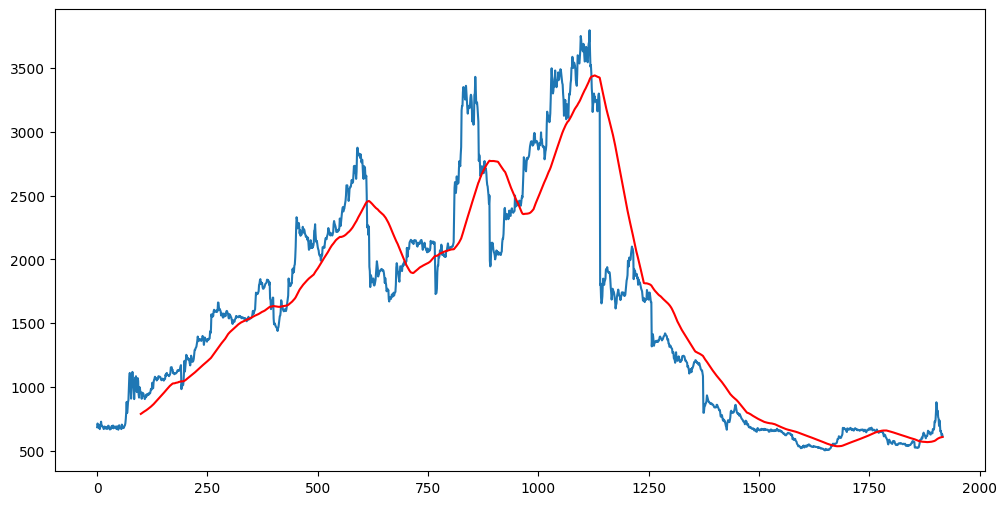

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')

In [8]:
ma200=df.close.rolling(200).mean()
ma200

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1912    620.160
1913    620.035
1914    619.840
1915    619.695
1916    619.425
Name: close, Length: 1917, dtype: float64

**Plotting ma100 and ma200**

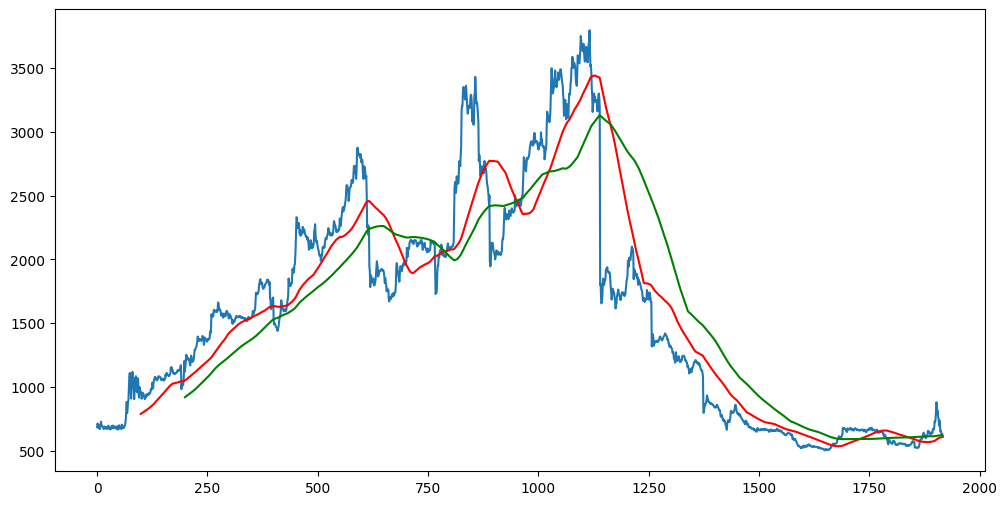

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
df.shape

(1917, 8)

# Splitting data for training and testing

In [11]:
data_training=pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1341, 1)
(576, 1)


In [12]:
data_training.head()

,close
0,685.0
1,714.0
2,700.0
3,681.0
4,702.0


In [13]:
data_testing.head()

,close
1341,1135.0
1342,1105.0
1343,1118.0
1344,1123.0
1345,1140.0


# Normalization Techniques

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array


array([[0.00638978],
       [0.01565495],
       [0.01118211],
       ...,
       [0.1571885 ],
       [0.15974441],
       [0.15527157]])

In [16]:
data_training.shape


(1341, 1)

In [17]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)


# Importing Necessary Libraries for LSTM model

In [18]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [19]:
x_train.shape


(1241, 100, 1)

LSTM MODEL

In [20]:
model = Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh',  return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

Training Process:

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
39/39 [==============================] - 17s 22ms/step - loss: 0.0285
Epoch 2/50
39/39 [==============================] - 1s 20ms/step - loss: 0.0098
Epoch 3/50
39/39 [==============================] - 1s 20ms/step - loss: 0.0098
Epoch 4/50
39/39 [==============================] - 1s 25ms/step - loss: 0.0080
Epoch 5/50
39/39 [==============================] - 1s 26ms/step - loss: 0.0084
Epoch 6/50
39/39 [==============================] - 1s 28ms/step - loss: 0.0081
Epoch 7/50
39/39 [==============================] - 1s 26ms/step - loss: 0.0069
Epoch 8/50
39/39 [==============================] - 1s 20ms/step - loss: 0.0065
Epoch 9/50
39/39 [==============================] - 1s 19ms/step - loss: 0.0070
Epoch 10/50
39/39 [==============================] - 1s 20ms/step - loss: 0.0054
Epoch 11/50
39/39 [==============================] - 1s 20ms/step - loss: 0.0056
Epoch 12/50
39/39 [==============================] - 1s 20ms/step - loss: 0.0056
Epoch 13/50
39/39 [=================

Saving the Model

In [22]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Picking the 100 data of training set

In [23]:
past_100_days=data_training.tail(100)

In [24]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [25]:
final_df.head()

,close
0,1665.0
1,1690.0
2,1681.0
3,1682.0
4,1689.0


Normalizing final_df

In [26]:
input_data=scaler.fit_transform(final_df)
input_data

array([[9.24363057e-01],
       [9.44267516e-01],
       [9.37101911e-01],
       [9.37898089e-01],
       [9.43471338e-01],
       [1.00000000e+00],
       [9.84076433e-01],
       [9.83280255e-01],
       [9.44267516e-01],
       [9.39490446e-01],
       [9.68152866e-01],
       [9.84076433e-01],
       [9.71337580e-01],
       [9.48248408e-01],
       [9.24363057e-01],
       [9.24363057e-01],
       [6.48089172e-01],
       [6.97452229e-01],
       [7.25318471e-01],
       [7.13375796e-01],
       [6.85509554e-01],
       [6.52070064e-01],
       [6.71974522e-01],
       [6.77547771e-01],
       [6.73566879e-01],
       [6.77547771e-01],
       [6.83121019e-01],
       [6.77547771e-01],
       [6.78343949e-01],
       [6.79936306e-01],
       [6.75955414e-01],
       [6.87898089e-01],
       [6.83917197e-01],
       [6.93471338e-01],
       [7.07802548e-01],
       [7.09394904e-01],
       [7.02229299e-01],
       [6.97452229e-01],
       [6.95063694e-01],
       [6.85509554e-01],


In [27]:
input_data.shape

(676, 1)

In [28]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(576, 100, 1)
(576,)


# Prediction:

In [29]:
y_predicted=model.predict(x_test)

18/18 [==============================] - 2s 15ms/step


In [30]:
y_predicted.shape

(576, 1)

In [31]:
y_test

array([0.50238854, 0.47850318, 0.4888535 , 0.49283439, 0.50636943,
       0.49681529, 0.48726115, 0.51273885, 0.51035032, 0.5183121 ,
       0.52627389, 0.53742038, 0.55015924, 0.55015924, 0.55414013,
       0.56210191, 0.55971338, 0.55414013, 0.54617834, 0.55015924,
       0.54378981, 0.54299363, 0.53423567, 0.54458599, 0.54140127,
       0.52707006, 0.5183121 , 0.50636943, 0.50238854, 0.49681529,
       0.49761146, 0.48009554, 0.46257962, 0.23407643, 0.23407643,
       0.26353503, 0.28423567, 0.28025478, 0.29299363, 0.29538217,
       0.3089172 , 0.34235669, 0.33280255, 0.32085987, 0.30971338,
       0.30175159, 0.30175159, 0.29617834, 0.29299363, 0.28901274,
       0.28901274, 0.29378981, 0.28742038, 0.28503185, 0.28582803,
       0.28423567, 0.27866242, 0.27149682, 0.26751592, 0.26751592,
       0.26910828, 0.26751592, 0.2683121 , 0.28343949, 0.28343949,
       0.27627389, 0.2683121 , 0.26353503, 0.25557325, 0.24920382,
       0.25159236, 0.23805732, 0.21178344, 0.21178344, 0.20780

In [32]:
y_predicted

array([[0.51925164],
       [0.51177394],
       [0.5016718 ],
       [0.49178064],
       [0.48495525],
       [0.4835763 ],
       [0.4854714 ],
       [0.48702455],
       [0.489971  ],
       [0.4939866 ],
       [0.49884278],
       [0.5044377 ],
       [0.5110736 ],
       [0.5191814 ],
       [0.5272223 ],
       [0.53398234],
       [0.5396482 ],
       [0.5436486 ],
       [0.54508674],
       [0.54338914],
       [0.5403657 ],
       [0.53686154],
       [0.53374815],
       [0.5305606 ],
       [0.52900136],
       [0.5290452 ],
       [0.5282322 ],
       [0.5250016 ],
       [0.5187368 ],
       [0.51073337],
       [0.50247735],
       [0.495702  ],
       [0.48916632],
       [0.48091745],
       [0.44602835],
       [0.39003763],
       [0.33225182],
       [0.28833845],
       [0.26366672],
       [0.2574124 ],
       [0.26416054],
       [0.2781764 ],
       [0.2969421 ],
       [0.3153789 ],
       [0.328063  ],
       [0.33206886],
       [0.3278311 ],
       [0.318

Checking by which factor the data were scaled down

In [33]:
scaler.scale_ #factors by with they were scaled down

array([0.00079618])

Rescaling Them to their original data points

In [34]:
scale_factor=1/0.00079618
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

# Plotting Original Prics Vs Predicted Price

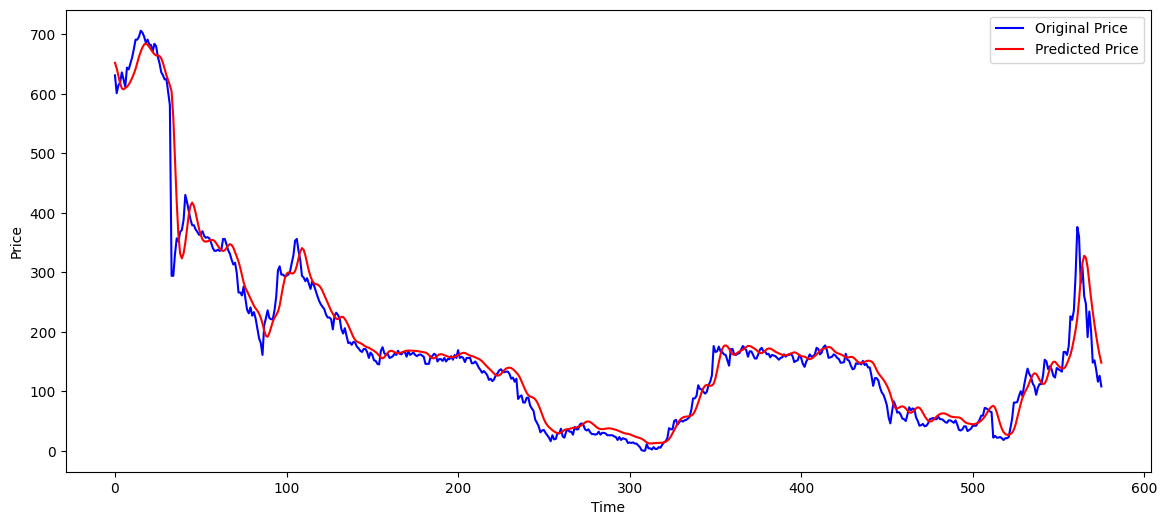

In [35]:
plt.figure(figsize=(14,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()